In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
import pandas as pd

plt.rcParams['figure.figsize'] = (12, 9)

# 1. Calibration

In [2]:
df = pd.read_csv('data/calibration_data.csv')
df['ratio'] = df['Line (cm)'] / df['Distance (cm)']
coeffs = np.polyfit(df['ratio'].to_numpy(), df['Line (pix)'].to_numpy(), 1)

# 2. Volume-Finding Task

In [3]:
picture_path = 'data/small_close.png'
object_distance = 25

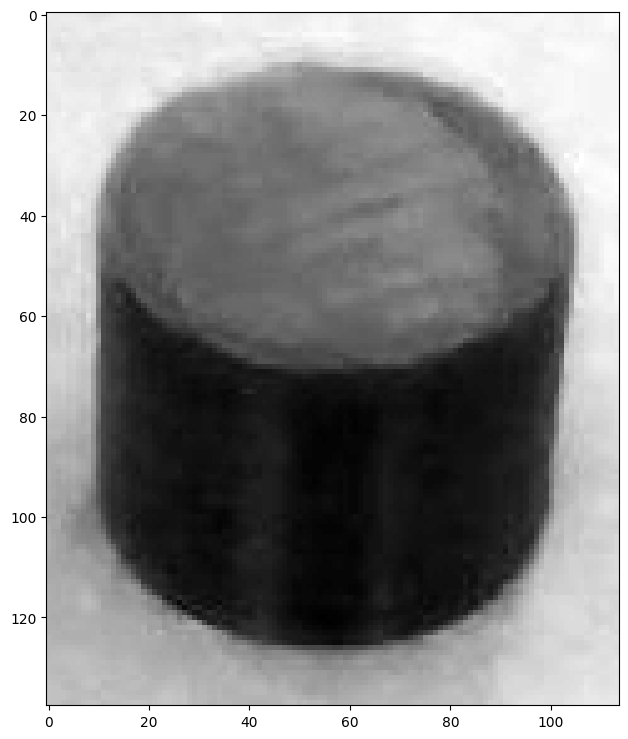

In [4]:
img = cv2.cvtColor(cv2.imread(picture_path), cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap='gray')
plt.show()

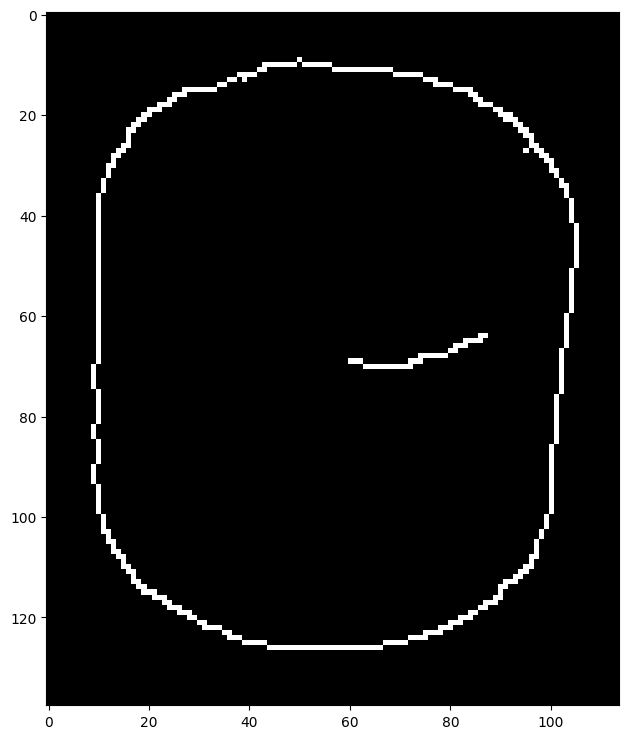

In [5]:
edge_img = cv2.Canny(img, 150, 40)
plt.imshow(edge_img, cmap='gray')
plt.show()
coords_tuple = np.where(edge_img > 0)
edge_pts = np.array((coords_tuple[1], coords_tuple[0])).T

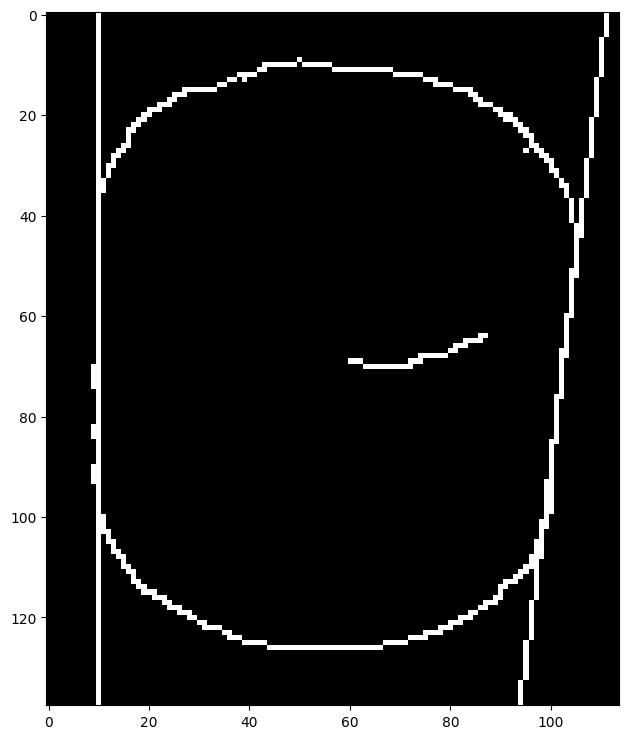

In [6]:
for i in range(100):
    lines = cv2.HoughLines(edge_img,1,np.pi/180,i)
    if len(lines) <= 4:
        break
lines = np.squeeze(lines)
lines = lines[lines[:, 0].argsort()]
lines = np.array([lines[0], lines[-1]])
color_img = cv2.cvtColor(edge_img, cv2.COLOR_GRAY2RGB)

for line in lines:
    rho,theta = line
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(color_img,(x1,y1),(x2,y2),(255,255,255),1)
gray = cv2.cvtColor(color_img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

In [7]:
rho,theta = lines[0]
a = np.cos(theta)
b = np.sin(theta)
x0 = a*rho
y0 = b*rho
line_0_pts = []
for i in np.arange(-1000, 1001):
    x1 = x0 + i*(-b)
    y1 = y0 + i*(a)
    line_0_pts.append([x1, y1])
line_0_pts = np.array(line_0_pts)

rho,theta = lines[1]
a = np.cos(theta)
b = np.sin(theta)
x0 = a*rho
y0 = b*rho
line_1_pts = []
for i in np.arange(-1000, 1001):
    x1 = x0 + i*(-b)
    y1 = y0 + i*(a)
    line_1_pts.append([x1, y1])
line_1_pts = np.array(line_1_pts)

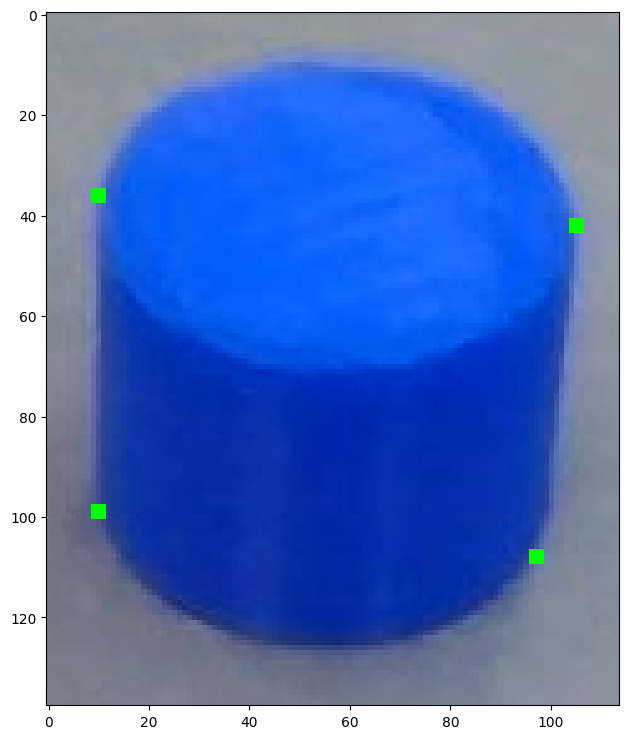

In [8]:
distances_line_0 = np.ndarray.min(distance.cdist(line_0_pts, edge_pts), axis=1)
arg_of_min_distance_line_0 = np.argmin(distances_line_0)
for i in np.arange(1, len(distances_line_0)):
    if np.all(distances_line_0[i:i+10] >= 1) and distances_line_0[i-1] < 1 and i > arg_of_min_distance_line_0:
        line_0_endpoint_1 = np.array([int(line_0_pts[i-1][0]), int(line_0_pts[i-1][1])])
        break
for i in np.flip(np.arange(0, len(distances_line_0)-1)):
    if np.all(distances_line_0[i-10:i] >= 1) and distances_line_0[i+1] < 1 and i <= arg_of_min_distance_line_0:
        line_0_endpoint_2 = np.array([int(line_0_pts[i][0]), int(line_0_pts[i][1])])
        break

distances_line_1 = np.ndarray.min(distance.cdist(line_1_pts, edge_pts), axis=1)
arg_of_min_distance_line_1 = np.argmin(distances_line_1)
for i in np.arange(1, len(distances_line_1)):
    if np.all(distances_line_1[i:i+10] >= 1) and distances_line_1[i] > 1 and distances_line_1[i-1] < 1 and i > arg_of_min_distance_line_1:
        line_1_endpoint_1 = np.array([int(line_1_pts[i-1][0]), int(line_1_pts[i-1][1])])
        break
for i in np.flip(np.arange(0, len(distances_line_1)-1)):
    if np.all(distances_line_1[i-10:i] >= 1) and distances_line_1[i+1] < 1 and distances_line_1[i-1] > 1 and i <= arg_of_min_distance_line_1:
        line_1_endpoint_2 = np.array([int(line_1_pts[i][0]), int(line_1_pts[i][1])])
        break

color_img = cv2.imread(picture_path)

color_img[line_0_endpoint_1[1],line_0_endpoint_1[0]]=[0,255,0]
color_img[line_0_endpoint_1[1]-1,line_0_endpoint_1[0]]=[0,255,0]
color_img[line_0_endpoint_1[1],line_0_endpoint_1[0]-1]=[0,255,0]
color_img[line_0_endpoint_1[1]-1,line_0_endpoint_1[0]-1]=[0,255,0]
color_img[line_0_endpoint_1[1]+1,line_0_endpoint_1[0]]=[0,255,0]
color_img[line_0_endpoint_1[1],line_0_endpoint_1[0]+1]=[0,255,0]
color_img[line_0_endpoint_1[1]+1,line_0_endpoint_1[0]+1]=[0,255,0]
color_img[line_0_endpoint_1[1]-1,line_0_endpoint_1[0]+1]=[0,255,0]
color_img[line_0_endpoint_1[1]+1,line_0_endpoint_1[0]-1]=[0,255,0]

color_img[line_0_endpoint_2[1],line_0_endpoint_2[0]]=[0,255,0]
color_img[line_0_endpoint_2[1]-1,line_0_endpoint_2[0]]=[0,255,0]
color_img[line_0_endpoint_2[1],line_0_endpoint_2[0]-1]=[0,255,0]
color_img[line_0_endpoint_2[1]-1,line_0_endpoint_2[0]-1]=[0,255,0]
color_img[line_0_endpoint_2[1]+1,line_0_endpoint_2[0]]=[0,255,0]
color_img[line_0_endpoint_2[1],line_0_endpoint_2[0]+1]=[0,255,0]
color_img[line_0_endpoint_2[1]+1,line_0_endpoint_2[0]+1]=[0,255,0]
color_img[line_0_endpoint_2[1]-1,line_0_endpoint_2[0]+1]=[0,255,0]
color_img[line_0_endpoint_2[1]+1,line_0_endpoint_2[0]-1]=[0,255,0]

color_img[line_1_endpoint_1[1],line_1_endpoint_1[0]]=[0,255,0]
color_img[line_1_endpoint_1[1]-1,line_1_endpoint_1[0]]=[0,255,0]
color_img[line_1_endpoint_1[1],line_1_endpoint_1[0]-1]=[0,255,0]
color_img[line_1_endpoint_1[1]-1,line_1_endpoint_1[0]-1]=[0,255,0]
color_img[line_1_endpoint_1[1]+1,line_1_endpoint_1[0]]=[0,255,0]
color_img[line_1_endpoint_1[1],line_1_endpoint_1[0]+1]=[0,255,0]
color_img[line_1_endpoint_1[1]+1,line_1_endpoint_1[0]+1]=[0,255,0]
color_img[line_1_endpoint_1[1]-1,line_1_endpoint_1[0]+1]=[0,255,0]
color_img[line_1_endpoint_1[1]+1,line_1_endpoint_1[0]-1]=[0,255,0]

color_img[line_1_endpoint_2[1],line_1_endpoint_2[0]]=[0,255,0]
color_img[line_1_endpoint_2[1]-1,line_1_endpoint_2[0]]=[0,255,0]
color_img[line_1_endpoint_2[1],line_1_endpoint_2[0]-1]=[0,255,0]
color_img[line_1_endpoint_2[1]-1,line_1_endpoint_2[0]-1]=[0,255,0]
color_img[line_1_endpoint_2[1]+1,line_1_endpoint_2[0]]=[0,255,0]
color_img[line_1_endpoint_2[1],line_1_endpoint_2[0]+1]=[0,255,0]
color_img[line_1_endpoint_2[1]+1,line_1_endpoint_2[0]+1]=[0,255,0]
color_img[line_1_endpoint_2[1]-1,line_1_endpoint_2[0]+1]=[0,255,0]
color_img[line_1_endpoint_2[1]+1,line_1_endpoint_2[0]-1]=[0,255,0]

plt.imshow(color_img)
plt.show()

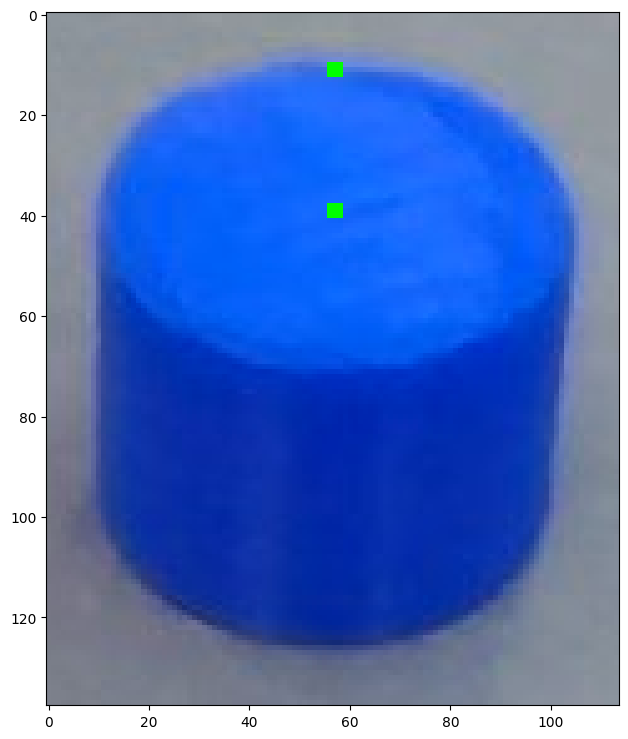

In [9]:
top_left = np.array([line_0_endpoint_1[0], line_0_endpoint_1[1]])
if line_0_endpoint_2[1] < line_0_endpoint_1[1]:
    top_left = np.array([line_0_endpoint_2[0], line_0_endpoint_2[1]])

top_right = np.array([line_1_endpoint_1[0], line_1_endpoint_1[1]])
if line_1_endpoint_2[1] < line_1_endpoint_1[1]:
    top_right = np.array([line_1_endpoint_2[0], line_1_endpoint_2[1]])

if top_right[0] < top_left[0]:
    intermediate = [top_right[0], top_right[1]]
    top_right = np.array([top_left[0], top_left[1]])
    top_left = np.array([intermediate[0], intermediate[1]])

midpoint_top = np.array([(top_right[0]+top_left[0])/2, (top_right[1]+top_left[1])/2])

color_img = cv2.imread(picture_path)

color_img[int(midpoint_top[1]),int(midpoint_top[0])]=[0,255,0]
color_img[int(midpoint_top[1]-1),int(midpoint_top[0])]=[0,255,0]
color_img[int(midpoint_top[1]),int(midpoint_top[0]-1)]=[0,255,0]
color_img[int(midpoint_top[1]-1),int(midpoint_top[0]-1)]=[0,255,0]
color_img[int(midpoint_top[1]+1),int(midpoint_top[0])]=[0,255,0]
color_img[int(midpoint_top[1]),int(midpoint_top[0]+1)]=[0,255,0]
color_img[int(midpoint_top[1]+1),int(midpoint_top[0]+1)]=[0,255,0]
color_img[int(midpoint_top[1]-1),int(midpoint_top[0]+1)]=[0,255,0]
color_img[int(midpoint_top[1]+1),int(midpoint_top[0]-1)]=[0,255,0]

minor_axis_ellipse_argument = np.argmin(distance.cdist([midpoint_top], edge_pts), axis=1)
closest_point = edge_pts[minor_axis_ellipse_argument][0]

color_img[closest_point[1],closest_point[0]]=[0,255,0]
color_img[closest_point[1]-1,closest_point[0]]=[0,255,0]
color_img[closest_point[1],closest_point[0]-1]=[0,255,0]
color_img[closest_point[1]-1,closest_point[0]-1]=[0,255,0]
color_img[closest_point[1]+1,closest_point[0]]=[0,255,0]
color_img[closest_point[1],closest_point[0]+1]=[0,255,0]
color_img[closest_point[1]+1,closest_point[0]+1]=[0,255,0]
color_img[closest_point[1]-1,closest_point[0]+1]=[0,255,0]
color_img[closest_point[1]+1,closest_point[0]-1]=[0,255,0]

plt.imshow(color_img)
plt.show()

In [10]:
major_axis_half_length = np.linalg.norm(top_right - midpoint_top)
minor_axis_half_length = np.linalg.norm(closest_point - midpoint_top)

perceived_height = (np.linalg.norm(line_1_endpoint_2 - line_1_endpoint_1) + np.linalg.norm(line_0_endpoint_2 - line_0_endpoint_1)) / 2

angle = np.arccos(minor_axis_half_length / major_axis_half_length)
height_pixels = perceived_height / np.sin(angle)

height_cm = object_distance * height_pixels / coeffs[0]
radius_cm = object_distance * major_axis_half_length / coeffs[0]
volume_cm_cubed = height_cm * radius_cm * radius_cm * np.pi

print(f'Diameter: {2 * radius_cm} cm')
print(f'Height: {height_cm} cm')
print(f'Volume: {volume_cm_cubed} cm cubed')

Diameter: 2.4938679179760617 cm
Height: 2.097726917397141 cm
Volume: 10.246740293059935 cm cubed
